### Load and understand the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
job_data = pd.read_csv('data_scientist_task_jobs_dataset.csv')

How many rows are there? How does it look like?

In [3]:
job_data.count()

job_id             6000
job_title          6000
job_description    6000
job_sector         6000
dtype: int64

In [4]:
job_data.isna().sum()

job_id             0
job_title          0
job_description    0
job_sector         0
dtype: int64

6000 rows and no missing data, great!

In [5]:
job_data.nunique()

job_id             6000
job_title          5026
job_description    5933
job_sector            6
dtype: int64

Some repetead job titles and some repetead descriptions. This could be an issue if the classifier trains on the repetead data and gets new data. Something worth keeping in mind.

How many jobs do we have of each category?

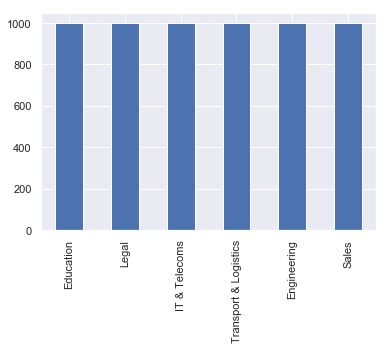

In [6]:
job_data['job_sector'].value_counts().plot(kind='bar')

Let's take a look at a few samples from each category

In [7]:
from IPython.display import display
for entry in ['Sales', 'Transport & Logistics', 'Education', 'Legal', 'IT & Telecoms', 'Engineering']:
    display(job_data[job_data['job_sector']==entry])

,job_id,job_title,job_description,job_sector
4000,9092985,Field Sales,Definite Requirements\nAbility to identify goo...,Sales
4001,13840184,Sales Executive / Account Manager,This is an excellent opportunity for a strong ...,Sales
4002,9093193,5 x Senior Sales Executives,Are you a natural sales person with cheeky per...,Sales
4003,13863589,Sales Executive Positions,WORK OVERSEAS IN BARCALONA... <br /><br />Our ...,Sales
4004,9093249,Trauma Sales Consultant - Medical Equipment - ...,Trauma Sales Consultant - Tyne & Wear\n\n£28-3...,Sales
4005,15310396,Field Sales Executive - Play Solutions,Field Sales Executive - Play Solutions<br />Lo...,Sales
4006,7213327,FSI Programs Director Europe,Our client is seeking a Financial Services Ind...,Sales
4007,15311137,NATIONAL ACCOUNTS MANAGER SELLING PARTY GIFTS ...,"Market leader"""" is a very common term used on ...",Sales
4008,5051323,Carrier Account Manager,Carrier Account Manager – Thus Plc \n\nLocatio...,Sales
4009,15311575,Insurance Sales Executive - Global Company,Insurance Sales Consulant - Worlds 4th Largest...,Sales


,job_id,job_title,job_description,job_sector
5000,25469918,C+E Drivers,<p>C&#43;E Drivers required for a busy compan...,Transport & Logistics
5001,26373906,Logistics and Compliance Controller,<p>Our client is seeking a Logistics and Comp...,Transport & Logistics
5002,25471909,Hand Enclosing,<p>Hand Enclosing - &#163;7ph</p> <p>My clien...,Transport & Logistics
5003,26381844,Class 1 Driver,<p>Job Title:</p> <p>Class 1 Driver</p> <p><...,Transport & Logistics
5004,25474808,7.5Tonne Driver,<p>We are currently recruiting for 7.5t (C1) ...,Transport & Logistics
5005,26385451,Transport & Freight Co-ordinator - Polish,<p>Dovetail Recruitment are excited to be wor...,Transport & Logistics
5006,25761663,Refuse/Recycling Loader,<p>MAIN PURPOSE OF JOB:</p> <p>To assist in p...,Transport & Logistics
5007,26386298,Supply Chain Coordinator,<strong>Organisation Description</strong><br /...,Transport & Logistics
5008,26267123,Assembler needed in Greenford to start ASAP !,<p>We currently have a vacancy for a producti...,Transport & Logistics
5009,26390214,Counterbalance Forklift Driver,My client in Earls Colne are looking to recrui...,Transport & Logistics


,job_id,job_title,job_description,job_sector
0,19549447,Geography Teacher,<p>Forde Education are looking to recruit a Te...,Education
1,7447537,PPA Cover teacher,Teachers Plus is seeking to employ a fully qua...,Education
2,26969327,Higher Level Teaching Assistant,We are currently recruiting High Level Teachin...,Education
3,7447589,Yr 2 Teacher,A suitably qualified and experienced Yr 2 Teac...,Education
4,26978624,Science Teachers,<strong>Job Description</strong><br /><br />Mo...,Education
5,7461623,TEACHER OF MATHS,A popular mixed Maidenhead secondary school i...,Education
6,26996572,Science Teacher,A successful Secondary School in the London Bo...,Education
7,7494389,Nursery Manager,Fantastic Nursery Managers vacancy in a beaut...,Education
8,26127364,Nursery Deputy Manager,<p><strong>Nursery Deputy Manager</strong></p...,Education
9,3565164,KS4 History (14/16 yr old),Teachers needed for various assignments Supply...,Education


,job_id,job_title,job_description,job_sector
3000,26196464,Corporate/ Finance Paralegal,<p>A highly respected US firm with a leading...,Legal
3001,27648328,Enfranchisement Lawyer,Are you an experienced Leasehold Enfranchiseme...,Legal
3002,26750761,Litigation Executive - Grade 1(RTA),<p>Our client is seeking a Litigation Executi...,Legal
3003,27673630,Legal PA - Litigation Arbitration US LAW FIRM,Legal PA - Litigation Arbitration (US LAW FIRM...,Legal
3004,26750917,Litigation Executive (Credit Hire ),<p>Our client is seeking a Litigation Executi...,Legal
3005,27684542,Legal Secretary,<p>Legal Secretary - Commercial Property <br ...,Legal
3006,27282169,Personal Injury Fee Earners (Litigator),<p>Our client one of the UK’s fastest growin...,Legal
3007,27690428,Qualified Residential Conveyancer,My client is looking to appoint a Residential ...,Legal
3008,27670807,Contentious Construction Solicitor,<p>Construction Lawyer - contentious - London...,Legal
3009,27738024,In-house Legal PA - Property,<p>A leading property and investment manager ...,Legal


,job_id,job_title,job_description,job_sector
2000,25076549,Software developer PHP lamp,<p>We are currently seeking open sourced cham...,IT & Telecoms
2001,5179005,Metadata Analyst,This position is based within a major blue chi...,IT & Telecoms
2002,25288482,CRM or Accounting Software Support Consultant ...,Excellent opportunity for a CRM or Accounting ...,IT & Telecoms
2003,5180025,ABAP Support Consultant - Steamserve - (West M...,Our client requires an experienced ABAP suppor...,IT & Telecoms
2004,26896836,Sage 200 Consultant for large reseller - flexi...,Sage 200 Consultant - you can be based anywher...,IT & Telecoms
2005,5185005,Analyst Programmer (Data),Opportunity exists within a dynamic organisati...,IT & Telecoms
2006,26921059,Software & Web Developers - Online Gaming - Gi...,<p>Our clients some of the leading and most ...,IT & Telecoms
2007,5198026,Programme Manager - Sarbanes Oxley SAS 70 - ...,UK WIDE ROLE (can be based out of London Bir...,IT & Telecoms
2008,26949607,ASP .NET Developer,<p>Job Title: ASP .NET Developer<br />Locatio...,IT & Telecoms
2009,5208106,Software Tester,Our client is looking for an experienced SOFTW...,IT & Telecoms


,job_id,job_title,job_description,job_sector
1000,27011750,Maintenance Technician,<p>This is a new position for a Multi-Skilled...,Engineering
1001,17569820,Internal Sales Engineer- Newbury,We are currently looking for an Internal Sales...,Engineering
1002,27490843,Graduates Needed for Sales Role with Growing T...,<p>Are you a recent Graduate who is seeking a...,Engineering
1003,17571982,Social Impacts Assessor,My Client is a high-valued consultancy engine...,Engineering
1004,27515684,Electrical Maintenance Engineer,<p>Our client is looking for an experienced M...,Engineering
1005,17577762,Mechanical Engineer,Mechanical Engineer.<br /><br />Salary From; £...,Engineering
1006,27554620,Graduate Software Engineer Chester £25 000,<p>Job/Person Specification - Graduate Softwa...,Engineering
1007,17609564,Catering Engineer,My client is a major supplier of commercial ca...,Engineering
1008,27665324,Assembly worker,<p>Our client is based in Hatton Brentwood t...,Engineering
1009,17618187,Real Time Control Systems Engineer,A Real Time Control Systems Engineer is requir...,Engineering


Let's take a look at individual columns:
- job_id - doesn't seem like a useful column. It looks like something the system has set up.
- job_title - looking clean - maybe mentions of yr instead of year for the Education sector, this might be an issue. It looks like the words in the title are very related to the job sector.
- job_description - the bulk of the data - looks like some of them have html tags. These should be removed. In some instances, the description contains locations or company name - maybe these could be extracted.
- job_sector - what we need to predict.

### Clean the data

Let's start by removing html tags from descriptions:

In [8]:
from bs4 import BeautifulSoup

for idx in range(1, 5):
    desc = job_data.iloc[idx]['job_description']
    soup = BeautifulSoup(desc)
    text = soup.get_text(separator=' ')
    print(desc)
    print(text)

Teachers Plus is seeking to employ a fully qualified teacher to cover Planning  Preparation and Assessment time for permanent staff within a school in the Wolverhampton area. This position is part time for 2.5 days per week. The post will require the right candidate to start with immediate effect. You must be able to cover all ages in the primary range and be able to adapt to any situation.We offer good rates of pay  a dedicated consultant and full support throughout your assignments.Interested? Please forward a copy of your CV to .

Teachers Plus is seeking to employ a fully qualified teacher to cover Planning  Preparation and Assessment time for permanent staff within a school in the Wolverhampton area. This position is part time for 2.5 days per week. The post will require the right candidate to start with immediate effect. You must be able to cover all ages in the primary range and be able to adapt to any situation.We offer good rates of pay  a dedicated consultant and full support

Great, BeautifulSoup can help us clean the descriptions. In some cases, we are losing some interesting tags such as &lt;strong>, but let's see if just the clean text will be good enough to work with. Let's apply it everywhere now.

In [9]:
job_data['clean_job_description'] = [
    BeautifulSoup(text).get_text(separator=' ') for text in job_data['job_description'] 
]

In [10]:
job_data.head()

,job_id,job_title,job_description,job_sector,clean_job_description
0,19549447,Geography Teacher,<p>Forde Education are looking to recruit a Te...,Education,Forde Education are looking to recruit a Teach...
1,7447537,PPA Cover teacher,Teachers Plus is seeking to employ a fully qua...,Education,Teachers Plus is seeking to employ a fully qua...
2,26969327,Higher Level Teaching Assistant,We are currently recruiting High Level Teachin...,Education,We are currently recruiting High Level Teachin...
3,7447589,Yr 2 Teacher,A suitably qualified and experienced Yr 2 Teac...,Education,A suitably qualified and experienced Yr 2 Teac...
4,26978624,Science Teachers,<strong>Job Description</strong><br /><br />Mo...,Education,Job Description Most Secondary Schools require...


Looks like the last cell above has the following sentence: "Reed Specialist Recruitment Limited is an employment agency and employment business". How often does it occur?

In [11]:
not_that_useful_sentence = "Reed Specialist Recruitment Limited is an employment agency and employment business"
job_data.loc[job_data['clean_job_description'].str.contains(not_that_useful_sentence)]['job_sector'].value_counts()

Education                103
Engineering               49
Legal                     27
Transport & Logistics     20
Sales                     14
IT & Telecoms             13
Name: job_sector, dtype: int64

It seems like it can occur in all the different sectors. A classifier might think that the sentence is important in the Education Sector and an option might be to remove this sentence. This might not necessarily be the way to go in production as this sentence could change ever so slightly or a different agency could add a similar sentence with their company names.

Let's see first how the classifier performs with it present.

The title seemed very correlated with the category, however, it could be that titles could be shared in the Engineering and IT & Telecoms areas. Let's start by adding the job title and the job description together into a single column:

In [12]:
job_data['title_and_clean_desc'] = (job_data['job_title'] + ' ') * 5 + ' ' + job_data['clean_job_description']
job_data.head()

,job_id,job_title,job_description,job_sector,clean_job_description,title_and_clean_desc
0,19549447,Geography Teacher,<p>Forde Education are looking to recruit a Te...,Education,Forde Education are looking to recruit a Teach...,Geography Teacher Geography Teacher Geography ...
1,7447537,PPA Cover teacher,Teachers Plus is seeking to employ a fully qua...,Education,Teachers Plus is seeking to employ a fully qua...,PPA Cover teacher PPA Cover teacher PPA Cover ...
2,26969327,Higher Level Teaching Assistant,We are currently recruiting High Level Teachin...,Education,We are currently recruiting High Level Teachin...,Higher Level Teaching Assistant Higher Level T...
3,7447589,Yr 2 Teacher,A suitably qualified and experienced Yr 2 Teac...,Education,A suitably qualified and experienced Yr 2 Teac...,Yr 2 Teacher Yr 2 Teacher Yr 2 Teacher Yr 2 Te...
4,26978624,Science Teachers,<strong>Job Description</strong><br /><br />Mo...,Education,Job Description Most Secondary Schools require...,Science Teachers Science Teachers Science Teac...


Next, let's convert the job sector to a categorical value and let's do a simple bag of words + tf-idf method to create a vector for the title_and_clean_desc:

In [13]:
job_data['job_sector'] = job_data['job_sector'].astype('category')
job_data['label_job_sector'] = job_data['job_sector'].cat.codes

label_to_category = dict(zip(job_data['label_job_sector'], job_data['job_sector']))

In [14]:
job_data.head()

,job_id,job_title,job_description,job_sector,clean_job_description,title_and_clean_desc,label_job_sector
0,19549447,Geography Teacher,<p>Forde Education are looking to recruit a Te...,Education,Forde Education are looking to recruit a Teach...,Geography Teacher Geography Teacher Geography ...,0
1,7447537,PPA Cover teacher,Teachers Plus is seeking to employ a fully qua...,Education,Teachers Plus is seeking to employ a fully qua...,PPA Cover teacher PPA Cover teacher PPA Cover ...,0
2,26969327,Higher Level Teaching Assistant,We are currently recruiting High Level Teachin...,Education,We are currently recruiting High Level Teachin...,Higher Level Teaching Assistant Higher Level T...,0
3,7447589,Yr 2 Teacher,A suitably qualified and experienced Yr 2 Teac...,Education,A suitably qualified and experienced Yr 2 Teac...,Yr 2 Teacher Yr 2 Teacher Yr 2 Teacher Yr 2 Te...,0
4,26978624,Science Teachers,<strong>Job Description</strong><br /><br />Mo...,Education,Job Description Most Secondary Schools require...,Science Teachers Science Teachers Science Teac...,0


Let's store this in a separate CSV.

In [15]:
job_data.to_csv('processed_job_data.csv')

### Model Creation

Now let's remove the features we do not require:

In [16]:
for var in [
    'job_id', 
    'job_description', 
    'job_sector', 
    'job_title',
    'clean_job_description',
]:
    job_data = job_data.drop(var, axis=1)

We will use cross-validation to select a model and then perform a final training session:

In [17]:
x = job_data.drop('label_job_sector', axis=1)
y = job_data['label_job_sector']

There are multiple ways to vectorize a piece of text:
* [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model)
* [tf-idf](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
* [doc2vec](https://radimrehurek.com/gensim/models/doc2vec.html)
* [Google BERT](https://github.com/hanxiao/bert-as-service)
   
Let's start with tf-idf and see how far we get.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x['title_and_clean_desc'], 
    y, 
    test_size = 0.2
)

#### Vectorizer experiments

In [20]:
tf_idf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.4)
tf_idf.fit_transform(x_train)

<4800x8396 sparse matrix of type '<class 'numpy.float64'>'
	with 414426 stored elements in Compressed Sparse Row format>

In [21]:
tf_idf.stop_words_

{'adjudicate',
 'vocationally',
 '0830am',
 'ssh',
 'harworkign',
 'ophthalmic',
 'eaton',
 'royce',
 'ecu',
 'ibis',
 'implants',
 'mpre13288640',
 'humres',
 'tevékenységek',
 'axial',
 'pri',
 'irlam',
 'gradeconstablelocationinitially',
 'corten',
 'arcade',
 'prepping',
 'hitachi',
 'expereinced',
 'flux',
 'oxbridge',
 'foxwell',
 'redundancy',
 '36000',
 'accrington',
 'polywrapping',
 '760',
 '21st',
 'ukooa',
 'prima',
 'retros',
 'breweries',
 'spin',
 'wordy',
 'irrigation',
 'work',
 '9774',
 'gkn',
 'impairment',
 'ofcom',
 'operationa',
 'tces',
 'cleint',
 'laytime',
 'svo',
 'mcl',
 'administrate',
 'desiable',
 'noc',
 'chapel',
 'negotiated',
 'delegations',
 'cve',
 'palo',
 'stockist',
 'accumuli',
 'mro',
 'phse',
 'directx',
 'films',
 'apologies',
 'webcam',
 'lhr',
 'tato',
 'mattresses',
 'compouter',
 'taxonomies',
 'uniteam',
 'anelectrical',
 '12500',
 'waterways',
 'streetworks',
 'va',
 'los',
 'erith',
 '2008r2',
 'goldmine',
 '17844',
 'passionately',
 '

In [22]:
tf_idf.get_feature_names()

['00',
 '000',
 '000k',
 '000p',
 '000pa',
 '00am',
 '00hrs',
 '00p',
 '00ph',
 '00pm',
 '01',
 '01173',
 '01173178000',
 '0121',
 '0161',
 '02',
 '020',
 '03',
 '033',
 '04',
 '0400',
 '05',
 '0500',
 '06',
 '0600',
 '07',
 '0700',
 '0730',
 '08',
 '0800',
 '0830',
 '09',
 '0900',
 '10',
 '100',
 '1000',
 '100k',
 '10am',
 '10g',
 '10k',
 '10m',
 '10pm',
 '11',
 '110',
 '11am',
 '11g',
 '11i',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '121',
 '123',
 '12noon',
 '12pm',
 '13',
 '130',
 '1300',
 '132kv',
 '14',
 '140',
 '1400',
 '14001',
 '14k',
 '14th',
 '15',
 '150',
 '1500',
 '15am',
 '15k',
 '15kg',
 '15pm',
 '15th',
 '16',
 '160',
 '1600',
 '1630',
 '16k',
 '16th',
 '17',
 '170',
 '1700',
 '178',
 '17k',
 '17th',
 '18',
 '180',
 '1800',
 '18000',
 '18001',
 '189',
 '18k',
 '18th',
 '19',
 '1900',
 '1973',
 '1974',
 '1976',
 '1990',
 '1991',
 '1992',
 '1994',
 '1997',
 '1998',
 '1999',
 '19k',
 '1m',
 '1pm',
 '1st',
 '1yr',
 '20',
 '200',
 '2000',
 '20000',
 '2002',
 '2003',
 '2004

#### Dummy Classifier - Baseline

In [23]:
from sklearn.dummy import DummyClassifier

dummy_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', DummyClassifier(strategy='most_frequent')),
])

dummy_clf.fit(x_train, y_train)
dummy_classifier_score = dummy_clf.score(x_test, y_test)
print(f"Dummy classifier score:  {dummy_classifier_score * 100}")

Dummy classifier score:  14.833333333333334


That's so bad! Even worse than expected given that the categories are equally represented

In [24]:
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', LogisticRegression()),
])

lg_scores = cross_val_score(logistic_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(lg_scores.mean() * 100, 2)} (+-{round(lg_scores.std() * 2 * 100, 2)})")

Accuracy: 93.96 (+-1.51)


This is not bad! Let's see how some other classifiers behave.

#### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', MultinomialNB()),
])

nb_scores = cross_val_score(nb_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(nb_scores.mean() * 100, 2)} (+-{round(nb_scores.std() * 2 * 100, 2)})")

Accuracy: 93.4 (+-1.43)


#### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', KNeighborsClassifier(n_neighbors = 60)),
])

knn_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(knn_scores.mean() * 100, 2)} (+-{round(knn_scores.std() * 2 * 100, 2)})")

Accuracy: 90.44 (+-1.73)


#### SVM

In [28]:
from sklearn.linear_model import SGDClassifier

svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', SGDClassifier(max_iter=2000, loss='log')),
])

svc_scores = cross_val_score(svc_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(svc_scores.mean() * 100, 2)} (+-{round(svc_scores.std() * 2 * 100, 2)})")

Accuracy: 94.29 (+-1.4)


#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=12)),
])

rf_scores = cross_val_score(rf_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(rf_scores.mean() * 100, 2)} (+-{round(rf_scores.std() * 2 * 100, 2)})")

Accuracy: 93.23 (+-1.62)


#### Neural Network

In [30]:
from sklearn.neural_network import MLPClassifier

nn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', MLPClassifier(hidden_layer_sizes=(50, 20))),
])

nn_scores = cross_val_score(nn_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(nn_scores.mean() * 100, 2)} (+-{round(nn_scores.std() * 2 * 100, 2)})")

Accuracy: 93.69 (+-1.89)


Looks like out of all of them, the SVM did the best job - 94% accuracy. Could an ensemble classifier do even better?

#### Ensemble

In [31]:
from sklearn.ensemble import VotingClassifier

e_v_clf = VotingClassifier(
    estimators=[
        ('svc', SGDClassifier(max_iter=2000, loss='log')), 
        ('knn', KNeighborsClassifier(n_neighbors = 60)),
        ('lc', LogisticRegression()),
        ('nb', MultinomialNB()),
        ('rf', RandomForestClassifier(n_estimators=100, n_jobs=12)),
        ('nn', MLPClassifier(hidden_layer_sizes=(50, 20))),
    ],
    voting='soft',
    n_jobs=20,
)

e_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', e_v_clf),
])

e_scores = cross_val_score(e_pipeline, x_train, y_train, cv=5)
print(f"Accuracy: {round(e_scores.mean() * 100, 2)} (+-{round(e_scores.std() * 2 * 100, 2)})")

Accuracy: 94.31 (+-1.63)


It does not look like anything better than 94% accuracy can be obtained with the current setup. Let's train the classifier now.

In [32]:
x_final_train, x_final_test, y_final_train, y_final_test = train_test_split(
    x['title_and_clean_desc'], 
    y, 
    test_size = 0.2
)

e_final_clf = VotingClassifier(
    estimators=[
        ('svc', SGDClassifier(max_iter=2000, loss='log')), 
        ('knn', KNeighborsClassifier(n_neighbors = 60)),
        ('lc', LogisticRegression()),
        ('nb', MultinomialNB()),
        ('rf', RandomForestClassifier(n_estimators=100, n_jobs=12)),
        ('nn', MLPClassifier(hidden_layer_sizes=(50, 20))),
    ],
    voting='soft',
    n_jobs=20,
)

e_final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)),
    ('clf', e_v_clf),
])

e_final_pipeline.fit(x_final_train, y_final_train)
e_final_pipeline_score = e_final_pipeline.score(x_test, y_test)
print(f"Final classifier score:  {e_final_pipeline_score * 100}")

Final classifier score:  97.58333333333333


Text(0.5, 39.453125, 'Predicted')

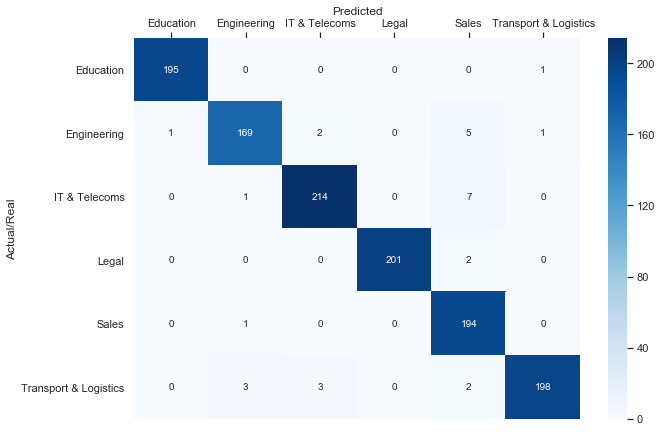

In [36]:
from sklearn.metrics import confusion_matrix

y_pred_final = e_final_pipeline.predict(x_test)
cnf_matrix_final = confusion_matrix(y_test, y_pred_final)

import numpy as np
unique_labels = np.unique(y_test)
unique_names = [label_to_category[t] for t in unique_labels]

df_cm = pd.DataFrame(
    cnf_matrix_final, 
    index = [i for i in unique_names],
    columns = [i for i in unique_names]
)
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.ylabel('Actual/Real')
plt.xlabel('Predicted')

The model is not doing that poorly. Adding the title only once has been tested as well as 10 times. The best value was 5.

### Save the classifier

In [34]:
from sklearn.externals import joblib
joblib.dump(e_final_pipeline, 'model.hdf5')
import json
with open('label_to_category.json', 'w') as f:
    json.dump(label_to_category, f)

Possible next steps here would be:
- dropping named entities - people's names, locations
- run this with random seed start to ensure that the accuracy values are maintained
- is this accuracy good enough
- try to tune the hyperparameters a bit more - number of times the title is added, use the title separately, or adjust the parameters of the classifiers
- try using one of the other vectorization methods mentioned above
- wrap everything with Flask and make deploy it using Docker in the Cloud :-)